# Import Libraries

In [193]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [194]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_balance_classification,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    plot_feature_importance_Classification,
    get_x_y,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
)

# call_visualization_def

In [195]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [196]:
df = read_data(r'Telco_customer_churn.xlsx', sheet_name='Telco_Churn')
original_df = copy.deepcopy(df)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Telco_customer_churn.xlsx


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [197]:
# Make the target is last column
df = target_last_col(df,'Churn Value')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,86,5372,Moved,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,89,5340,Competitor had better devices,1


# Get Information of Data

In [198]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score',
       'CLTV', 'Churn Reason', 'Churn Value'],
      dtype='object')

In [199]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043,7043,0
1,Count,int64,[1],1,7043,0
2,Country,object,[United States],1,7043,0
3,State,object,[California],1,7043,0
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129,7043,0
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015, 90020, 900...",1652,7043,0
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652,7043,0
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652,7043,0
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651,7043,0
9,Gender,object,"[Male, Female]",2,7043,0


# drop not useful columns

#### list of columns

In [200]:
not_useful_columns_name = ['CustomerID', 'Count', 'Country', 'State', 'Churn Label', 'Churn Reason']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [201]:
not_useful_columns(df=df, column_name="Lat Long")

# change the dtype of the column from object to numeric

#### list of columns

In [202]:
convert_to_numeric_columns_name = ['Total Charges']
convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [203]:
# convert_to_numeric(df=df, column_name='Total Charges')

# Describe numerical column and his information

In [204]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['Zip Code',
 'Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Score',
 'CLTV',
 'Churn Value']

In [205]:
df.describe()

,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000
mean,93521.964646,36.282441,-119.798880,32.371149,64.761692,2283.300441,58.699418,4400.295755,0.265370
std,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.771362,21.525131,1183.057152,0.441561
min,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,5.000000,2003.000000,0.000000
25%,92102.000000,34.030915,-121.815412,9.000000,35.500000,401.450000,40.000000,3469.000000,0.000000
50%,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,61.000000,4527.000000,0.000000
75%,95351.000000,38.224869,-118.043237,55.000000,89.850000,3794.737500,75.000000,5380.500000,1.000000
max,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,100.000000,6500.000000,1.000000


# Describe object column and his information

In [206]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method']

In [207]:
df.describe(include=['object'])

,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1129,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Los Angeles,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,305,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


# Data Encoding columns with 2 unique values

In [208]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [209]:
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,1,1,1,1,2,1,...,No,No,Month-to-month,1,Mailed check,53.85,108.15,86,3239,1
1,Los Angeles,90005,34.059281,-118.307420,0,1,1,0,2,1,...,No,No,Month-to-month,1,Electronic check,70.70,151.65,67,2701,1
2,Los Angeles,90006,34.048013,-118.293953,0,1,1,0,8,1,...,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,86,5372,1
3,Los Angeles,90010,34.062125,-118.315709,0,1,0,0,28,1,...,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,84,5003,1
4,Los Angeles,90015,34.039224,-118.266293,1,1,1,0,49,1,...,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,89,5340,1


# check columns have nulls

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

In [211]:
df.isnull().sum()

City                  0
Zip Code              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Score           0
CLTV                  0
Churn Value           0
dtype: int64

## Identify columns with missing values

In [212]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['Total Charges']


# Removing Rows with Missing Values

#### list of columns

In [213]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [214]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [215]:
# remove_missing_rows(df=df)

## check columns with missing values

In [216]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['Total Charges']


# Filling Missing Values

### Filling Missing Values for all DataFrame

In [217]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [218]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [219]:
df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

Columns with missing values: ['Total Charges']
Starting imputation for columns ['Total Charges'] using KNNImputer model
Imputation completed for columns ['Total Charges'] using KNNImputer model


### check columns with missing values

In [220]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [221]:
outliers_df = check_outliers(df)

Zip Code             7043
Latitude                0
Longitude            7043
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Paperless Billing       0
Monthly Charges         0
Total Charges        5941
Churn Score             0
CLTV                 7043
Churn Value             0
dtype: int64


## check outliers (plots)

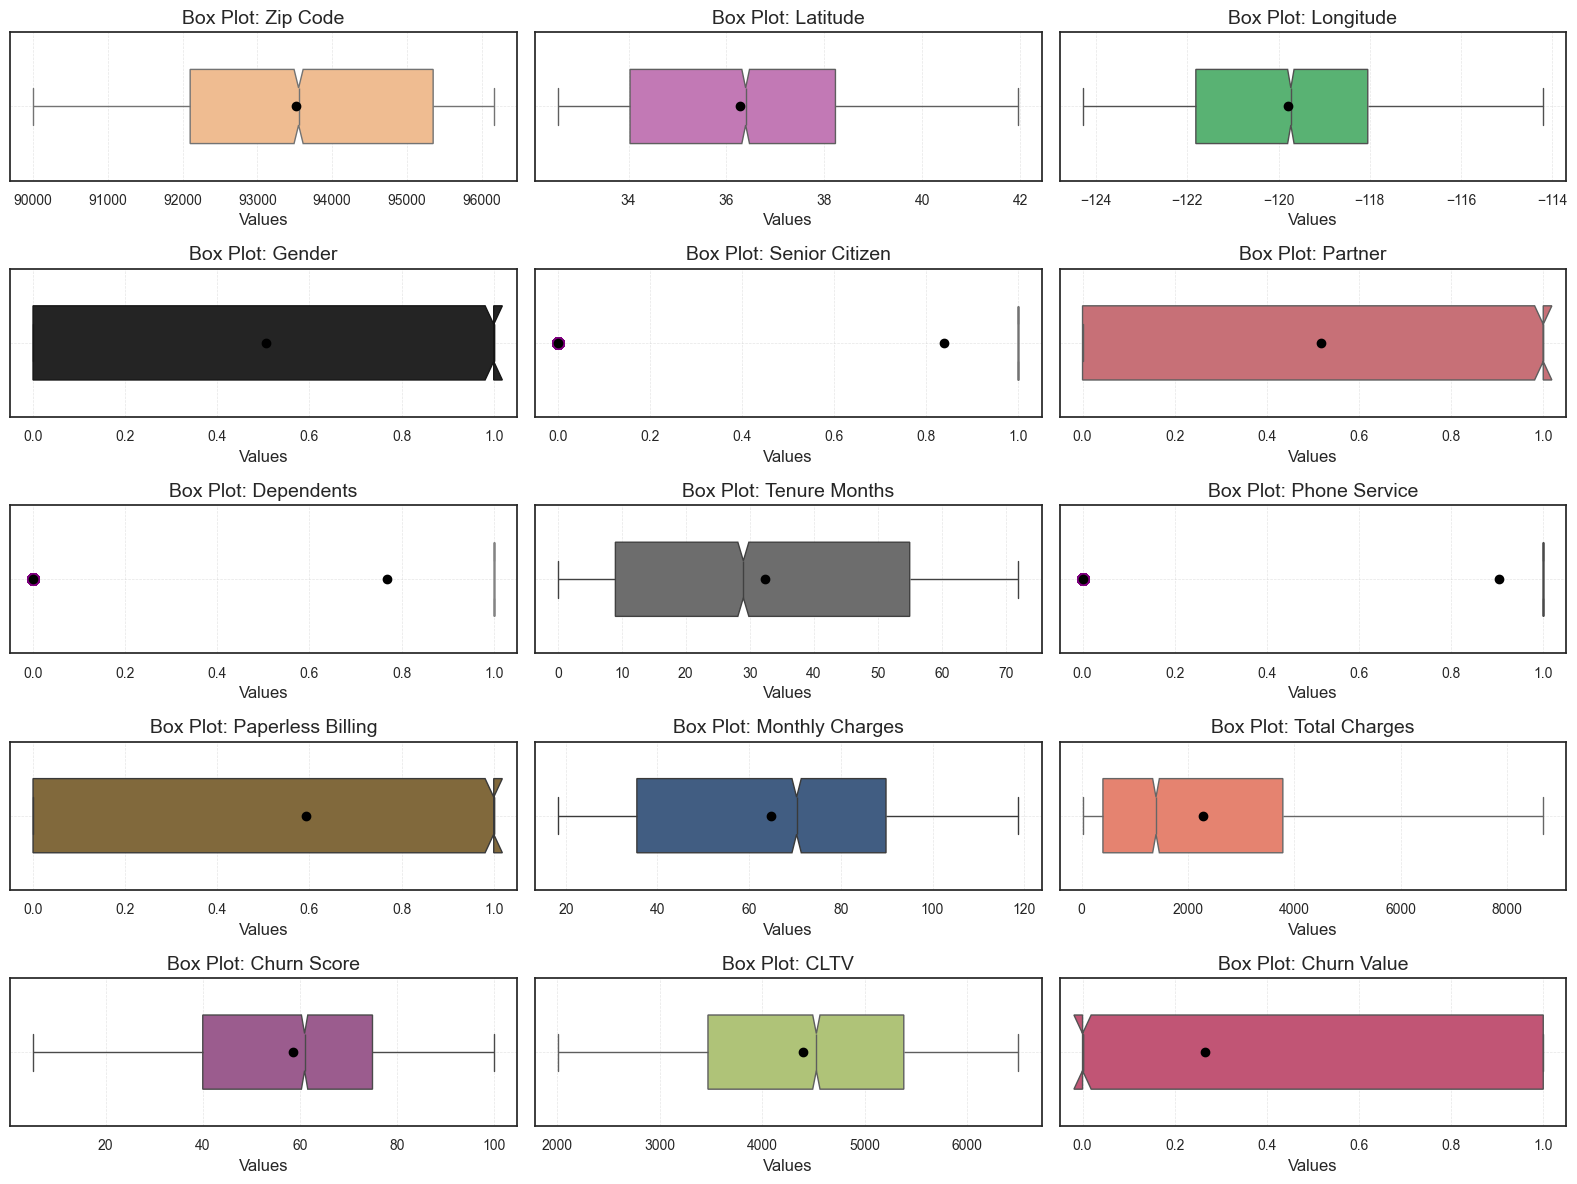

In [222]:
box_plot_all_columns(df, subplot_row = 3)

# Check the unbalance data

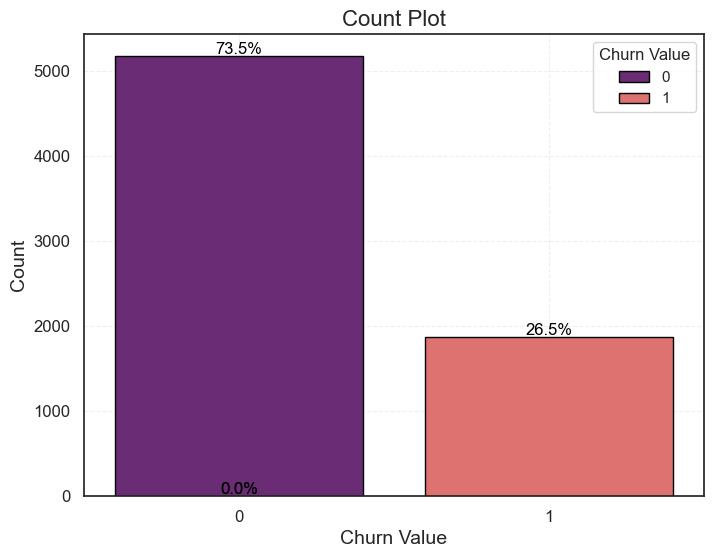

,count
name,
0,5174
1,1869


In [223]:
check_balance_classification(df,column_plot='Churn Value')

# Visualization

In [224]:
# use ML_visualization to make plot from the data

## Histogram

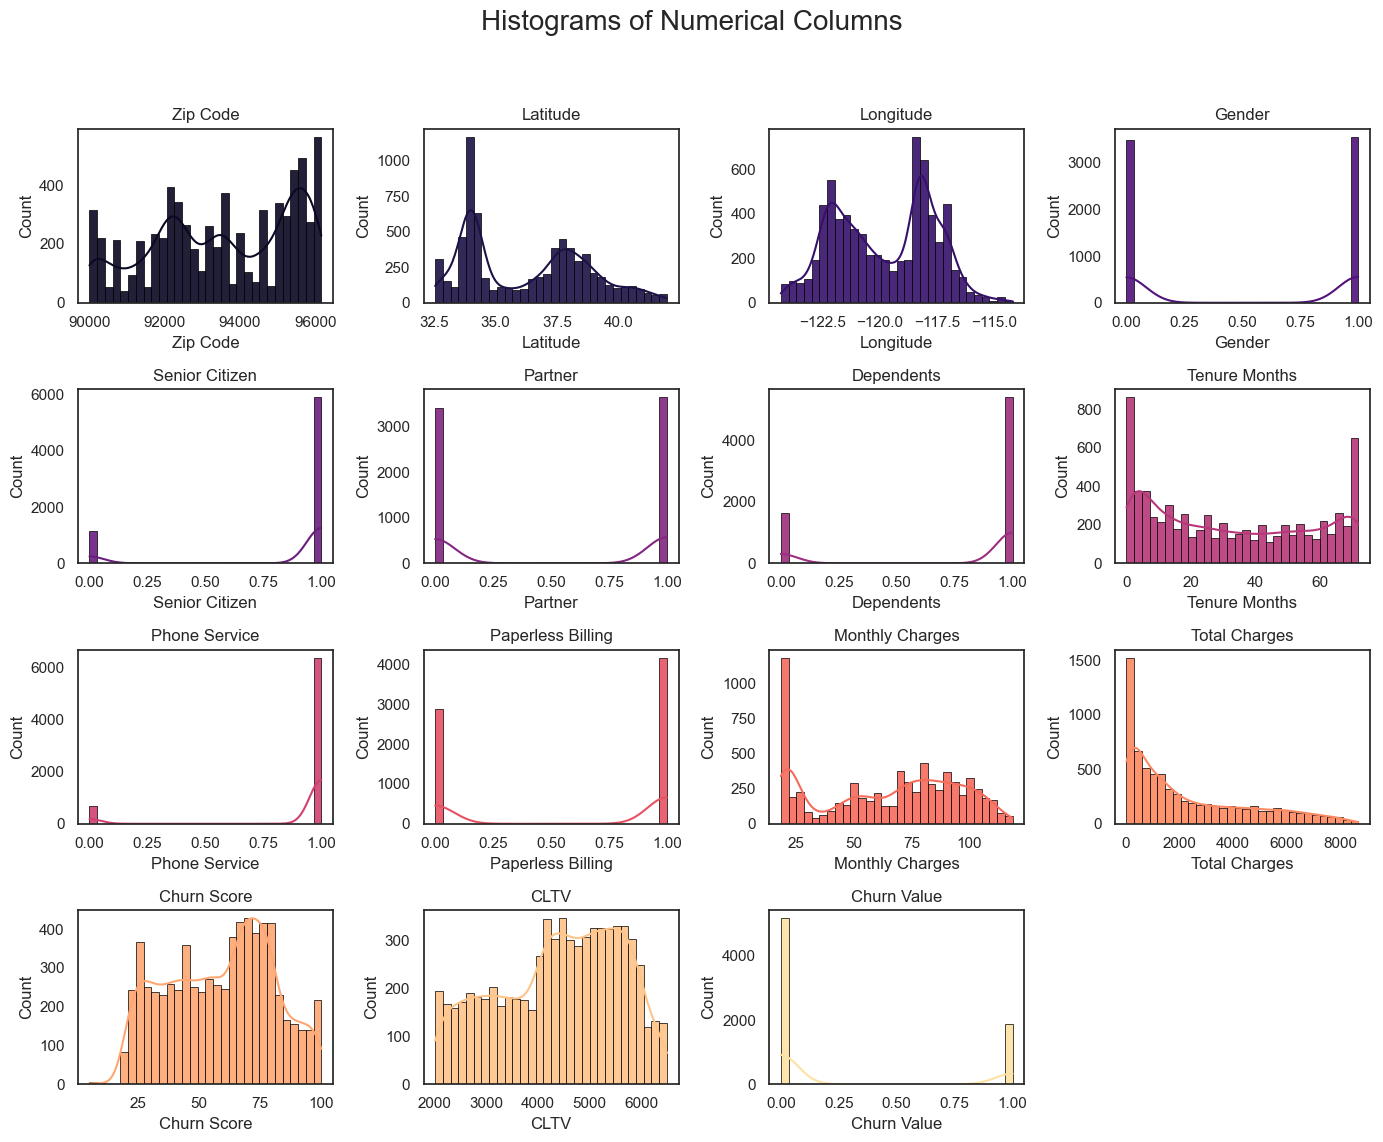

In [225]:
plot_histograms(df,column=None, bins=30)

# Visualization by Groupby and pivot

## Groupby and pivot

### Groupby

In [226]:
# grouped_df = df.groupby('')

### pivot

In [227]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [228]:
calculate_correlation(df, outcome_column='Churn Value',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
           Variable  Pearson Coefficient        P-Value
12      Churn Score             0.664897   0.000000e+00
7     Tenure Months            -0.352229  7.999058e-205
6        Dependents             0.248542   1.234365e-99
11    Total Charges            -0.199428   4.233836e-64
10  Monthly Charges             0.193356   2.706646e-60

Churn Score
The Pearson Correlation Coefficient for Churn Score is 0.6649 with a P-value of P = 0

Tenure Months
The Pearson Correlation Coefficient for Tenure Months is -0.3522 with a P-value of P = 7.999e-205

Dependents
The Pearson Correlation Coefficient for Dependents is 0.2485 with a P-value of P = 1.234e-99

Total Charges
The Pearson Correlation Coefficient for Total Charges is -0.1994 with a P-value of P = 4.234e-64

Monthly Charges
The Pearson Correlation Coefficient for Monthly Charges is 0.1934 with a P-value of P = 2.707

,Variable,Pearson Coefficient,P-Value
12,Churn Score,0.664897,0.000000e+00
7,Tenure Months,-0.352229,7.999058e-205
6,Dependents,0.248542,1.234365e-99
11,Total Charges,-0.199428,4.233836e-64
10,Monthly Charges,0.193356,2.706646e-60


## Visualize Correlation with Heatmap

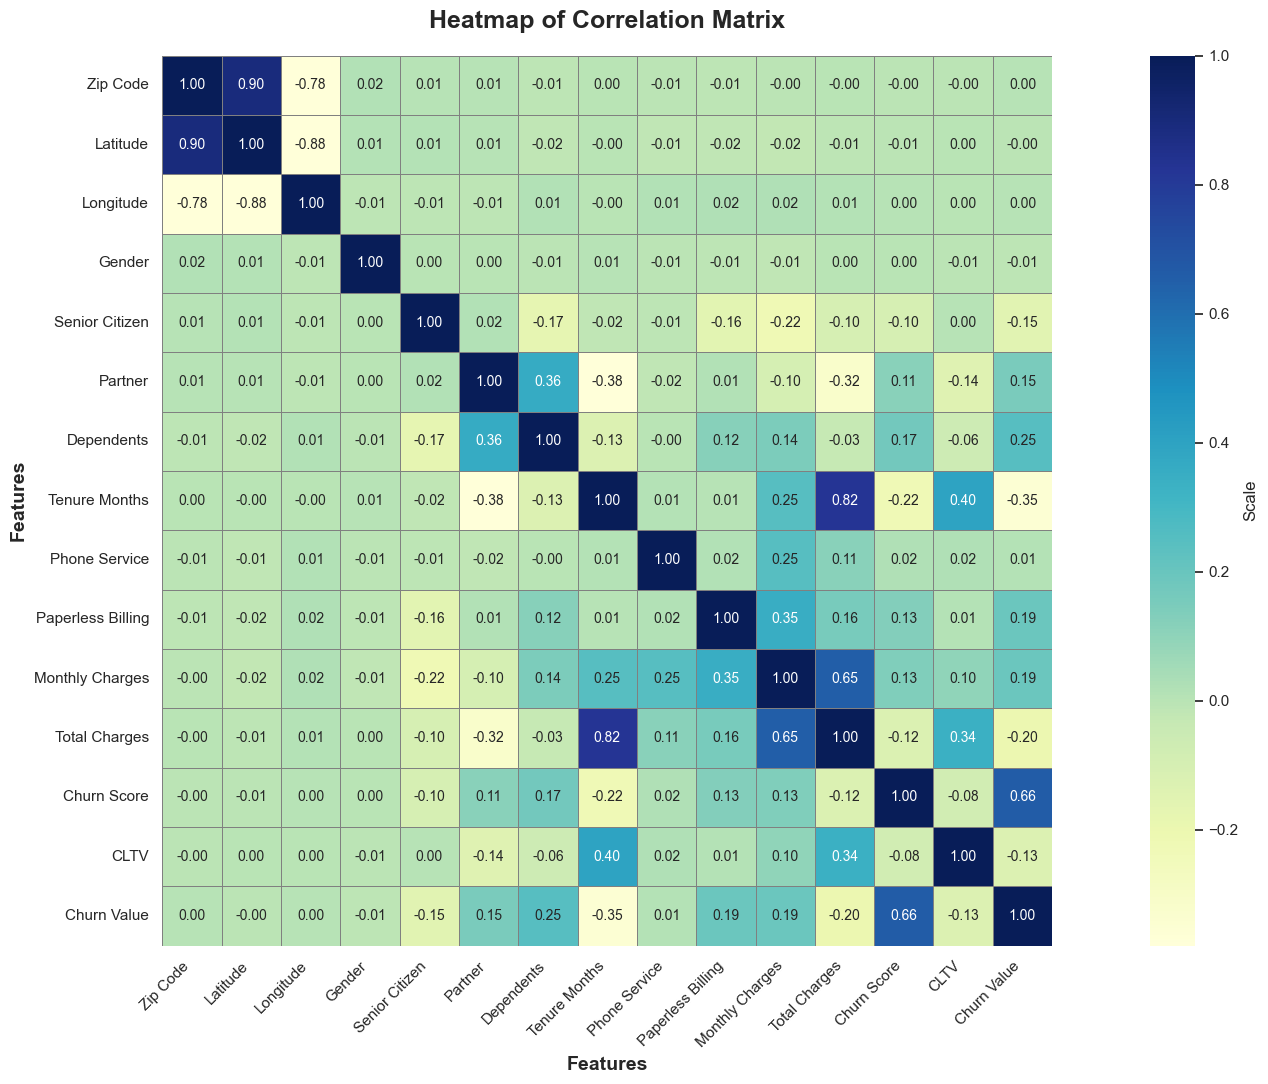

In [229]:
correlations = Heatmap_Correlation(df, mask=-1)

# Data Encoding

In [230]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['City',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Payment Method']

In [231]:
column = ['Multiple Lines',
        'Internet Service',
        'Online Security',
        'Online Backup',
        'Device Protection',
        'Tech Support',
        'Streaming TV',
        'Streaming Movies',
        'Contract',
        'Payment Method']

df = encode_column(df, columns = column, method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')
df = encode_column(df, columns = 'City', method='target',target="Churn Value")
# ordinal_categories = df['Dependents'].value_counts().index.to_list()
# df = encode_column(df, columns = '', method= 'ordinal', ordinal_categories=ordinal_categories)

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [232]:
len(df.columns)

37

## Make the target is last column

In [233]:
df = target_last_col(df,'Churn Value')
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Value
0,0.295082,90003,33.964131,-118.272783,1,1,1,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.295082,90005,34.059281,-118.307420,0,1,1,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.295082,90006,34.048013,-118.293953,0,1,1,0,8,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,0.295082,90010,34.062125,-118.315709,0,1,0,0,28,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.295082,90015,34.039224,-118.266293,1,1,1,0,49,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


# Repair unbalanced data by using oversampling and undersampling.

In [234]:
x, y = get_x_y(df, target='Churn Value')

In [235]:
df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=1)

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({0: 5174, 1: 1869})

use SVMSMOTE model for oversampling
Applying SVMSMOTE with strategy 0.75
after oversampling class distribution: Counter({0: 5174, 1: 3880})

use TomekLinks model for undersampling
Applying TomekLinks under-sampling.
after undersampling class distribution: Counter({0: 4695, 1: 3880})

Final class distribution: Counter({0: 4695, 1: 3880})
Over-sampling and/or under-sampling process completed.


### Check the unbalance data after repair 

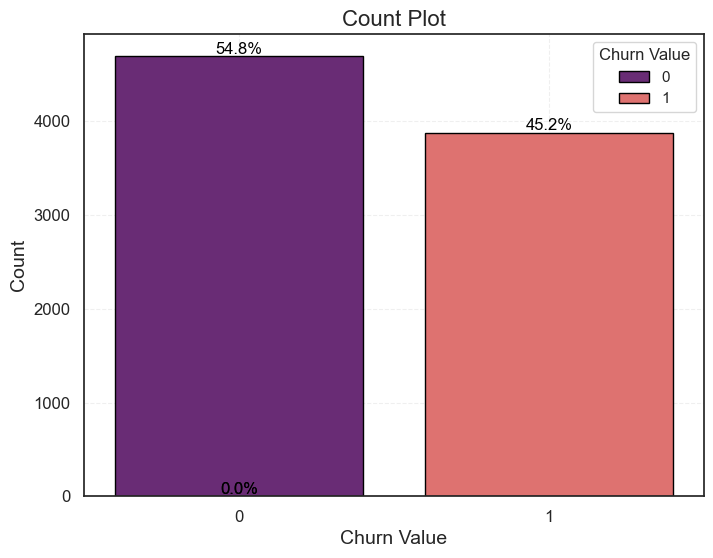

,count
name,
0,4695
1,3880


In [236]:
check_balance_classification(df,column_plot='Churn Value')

# Get X , Y (TVT)

In [237]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target='Churn Value')

In [238]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (6036, 36)
x_valid shape = (824, 36)
x_test shape = (1715, 36)
y_train shape = (6036,)
y_valid shape = (824,)
y_test shape = (1715,)


# Get train, valid and test data in same time

In [239]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [240]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [241]:
print(len(df.columns))

37


In [242]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=25)
x = FS_model.transform(x)

# Dimensionality Reduction

In [243]:
# print(len(df.columns))

In [244]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, method= 'PCA', n_components=25)
# x = DR_model.transform(x)

# Train

## Grid Search

In [245]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

In [246]:
ensemble_estimators = [('rf', RandomForestClassifier()), ('svm', SVC())]
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
best_params = 0.9586563792549218


In [247]:
model = best_estimator
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Random Search

In [248]:
# ensemble_estimators = [('rf', RandomForestClassifier()), ('svc', SVC())]
# best_params, best_score, best_estimator = random_search_classifier('RandomForestClassifier', x_train, y_train, cv=type_cross_valid)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [249]:
# model = best_estimator
# model

## Train Without Search Classification

In [250]:
# model = get_classifier('xgboost_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1)
# model

#### Examples

In [251]:
# # Example usage for each model

# # Logistic Regression
# logistic_regression_model = get_classifier(
#     'logistic_regression', x_train, y_train, solver='liblinear', max_iter=100
# )

# # Naive Bayes
# naive_bayes_model = get_classifier(
#     'naive_bayes', x_train, y_train
# )

# # K-Neighbors Classifier
# kneighbors_classifier_model = get_classifier(
#     'kneighbors_classifier', x_train, y_train, n_neighbors=5, algorithm='auto'
# )

# # Support Vector Classifier
# svc_model = get_classifier(
#     'svc', x_train, y_train, kernel='rbf', C=1.0
# )

# # Decision Tree Classifier
# decision_tree_classifier_model = get_classifier(
#     'decision_tree_classifier', x_train, y_train, criterion='gini', max_depth=None
# )

# # Random Forest Classifier
# random_forest_classifier_model = get_classifier(
#     'random_forest_classifier', x_train, y_train, n_estimators=100, max_depth=None
# )

# # Bagging Classifier
# bagging_classifier_model = get_classifier(
#     'bagging_classifier', x_train, y_train, n_estimators=10, base_estimator=None
# )

# # AdaBoost Classifier
# adaboost_classifier_model = get_classifier(
#     'adaboost_classifier', x_train, y_train, n_estimators=50, learning_rate=1.0
# )

# # Gradient Boosting Classifier
# gradient_boosting_classifier_model = get_classifier(
#     'gradient_boosting_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # XGBoost Classifier
# xgboost_classifier_model = get_classifier(
#     'xgboost_classifier', x_train, y_train, n_estimators=100, learning_rate=0.1
# )

# # Stacking Classifier
# stacking_classifier_model = get_classifier(
#     'stacking_classifier', x_train, y_train, estimators=[
#         ('lr', LogisticRegression()),
#         ('rf', RandomForestClassifier(n_estimators=10))
#     ], final_estimator=LogisticRegression()
# )

# Check Overfitting

Accuracy:
Training Accuracy: 0.9589
Validation Accuracy: 0.9539

Precision:
Training Precision: 0.9592
Validation Precision: 0.9541

Recall:
Training Recall: 0.9589
Validation Recall: 0.9539

F1-Score:
Training F1-Score: 0.9590
Validation F1-Score: 0.9539

MCC:
Training MCC: 0.9174
Validation MCC: 0.9073

Balanced Accuracy:
Training Balanced Accuracy: 0.9596
Validation Balanced Accuracy: 0.9544

Confusion Matrix:
Validation Confusion Matrix:
[[427  23]
 [ 15 359]]

Cross-Validation(CV):
Cross-Validation Scores: [0.94635569 0.95393586 0.94810496 0.95976676 0.95043732]
Cross-Validation Mean Score: 0.9517


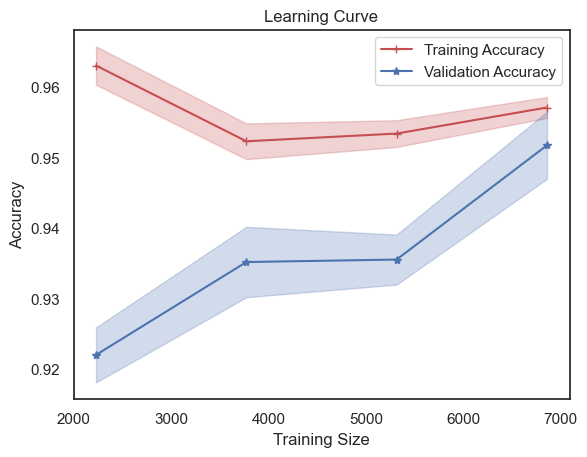

ROC AUC: 0.9902


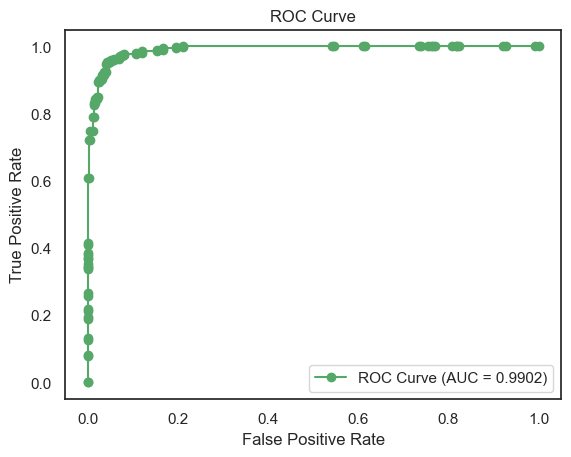

In [252]:
Check_Overfitting_Classification(model,x,y,x_train,y_train,x_valid,y_valid)

# plot feature importance

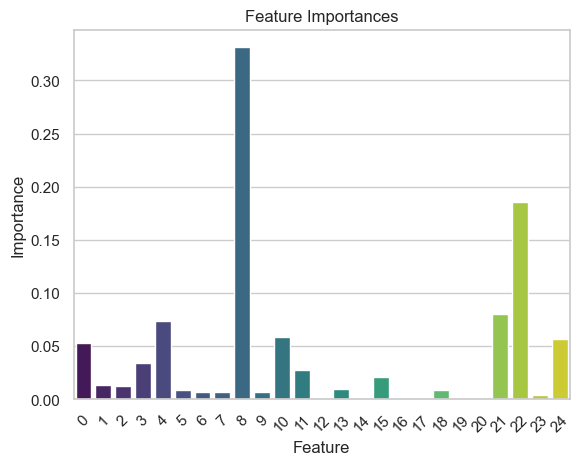

In [253]:
plot_feature_importance_Classification(model=model,x_train=x_train,orientation=None)

# Get y_predict

In [254]:
y_pred = model.predict(x_test)

# Evaluate model

## Evaluate model Classification

### Confusion Matrix

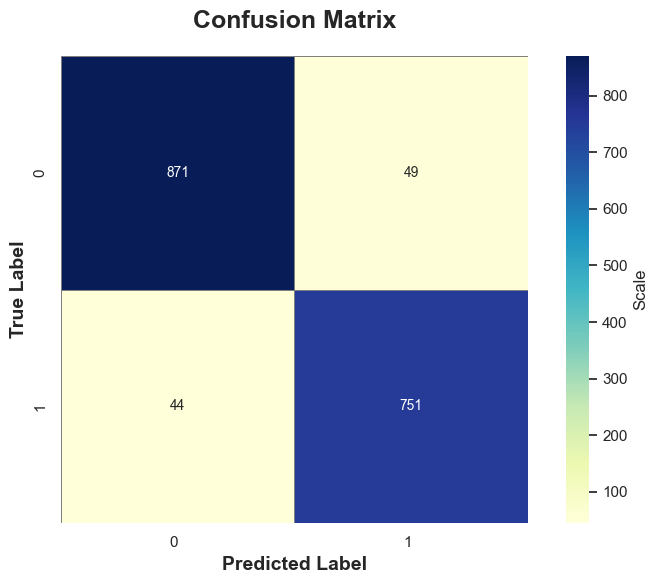

In [255]:
plot_confusion_matrix(y_test, y_pred)

### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.9458
Recall score = 0.9447
Precision score = 0.9387
F1 score = 0.9417
ROC AUC score = 0.9457


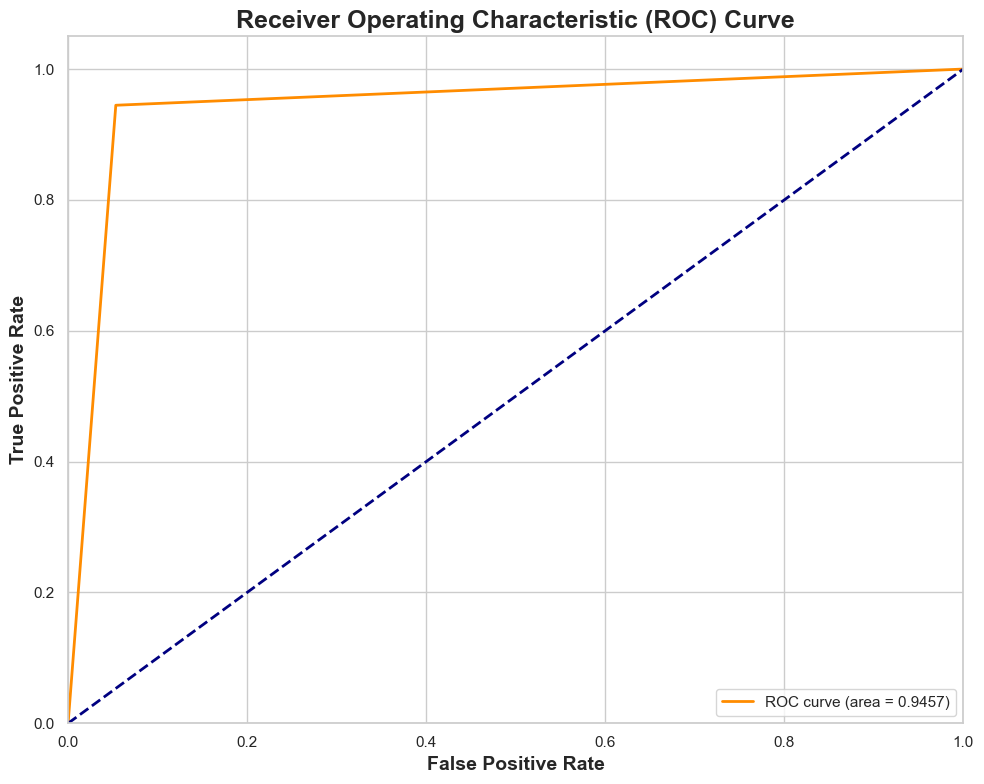

In [256]:
evaluate_model_Classification(y_test, y_pred)